In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
index=0
b=np.zeros((8,8))
for i in range(8):
    b[i]=digits['images'][index].T[7-i]
b


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  5.,  8.,  8.,  8.,  7.,  0.,  0.],
       [ 1., 15., 11.,  8.,  9., 12., 12.,  0.],
       [ 9., 10.,  0.,  0.,  0.,  1., 10., 10.],
       [13., 15.,  2.,  0.,  0.,  0.,  5., 13.],
       [ 5., 13., 15., 12.,  8., 11., 14.,  6.],
       [ 0.,  0.,  3.,  4.,  5.,  4.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [4]:
b[0,0]=15
b[0,7]=15
b[7,0]=15
b[7,7]=15

In [5]:
a = np.ones((8,8),dtype=float)*15
a

array([[15., 15., 15., 15., 15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15.],
       [15., 15., 15., 15., 15., 15., 15., 15.]])

Text(0, 7, '0')

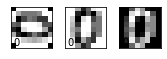

In [6]:
fig3 = plt.figure(figsize=(6,6)) # figure size in inches
fig3.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
ax1 = fig3.add_subplot(10,8,1,xticks=[],yticks=[])
ax1.imshow(b,cmap=plt.cm.binary,interpolation='nearest')
    # label the image with the target value
ax1.text(0,7,str(digits.target[index]))
ax1 = fig3.add_subplot(10,8,2,xticks=[],yticks=[])
ax1.imshow(digits['images'][index],cmap=plt.cm.binary,interpolation='nearest')
    # label the image with the target value
ax1.text(0,7,str(digits.target[index]))
ax1 = fig3.add_subplot(10,8,3,xticks=[],yticks=[])
ax1.imshow((a-digits.images[0]),cmap=plt.cm.binary,interpolation='nearest')
    # label the image with the target value
ax1.text(0,7,str(digits.target[index]))

In [7]:
digits['images'][5]

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

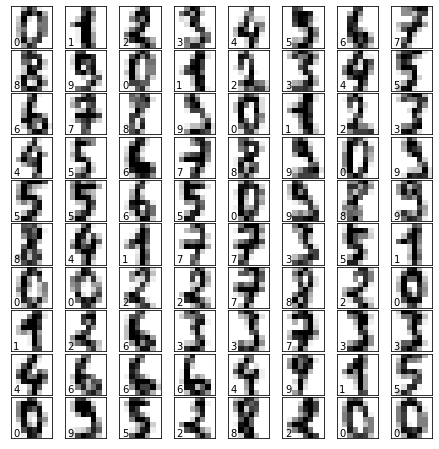

In [8]:
fig = plt.figure(figsize=(6,6)) # figure size in inches
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)


# plot the digits

for i in range(80):
    ax = fig.add_subplot(10,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    # label the image with the target value
    ax.text(0,7,str(digits.target[i]))

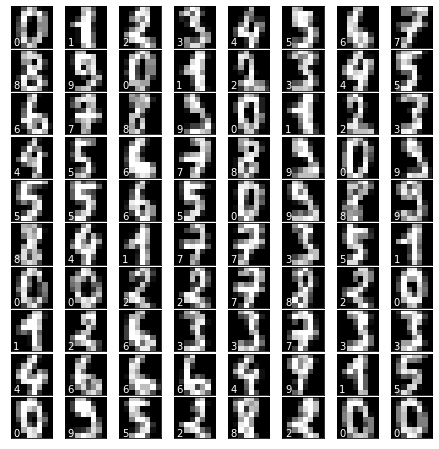

In [9]:
fig2 = plt.figure(figsize=(6,6)) # figure size in inches
fig2.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

for i in range(80):
    axe = fig2.add_subplot(10,8,i+1,xticks=[],yticks=[])
    axe.imshow(a-digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    # label the image with the target value
    axe.text(0,7,str(digits.target[i]),color=(1,1,1))

In [10]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(digits.data,digits.target,random_state=0)


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)

## Take a look at the classifier report

In [11]:
from sklearn import metrics
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



### the accuracy is 0.98 = 98%

## model test : initial data

[0][1][2][3][4][9][6][7]

[8][9][0][1][2][3][4][5]

[6][7][8][9]

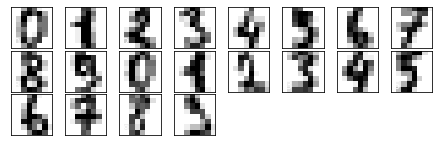

In [12]:
fig3 = plt.figure(figsize=(6,6)) # figure size in inches
fig3.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for index in range(20):
    c=digits['images'][index].reshape(1,64)
    print(model.predict(c),end='')
    if (index+1)%8==0:print('\n')
    ax1 = fig3.add_subplot(10,8,1+index,xticks=[],yticks=[])
    ax1.imshow((digits['images'][index]),cmap=plt.cm.binary,interpolation='nearest')
    # label the image with the target value
    ax1.text(0,7,str(digits.target[index]),color=(1,1,1))

## 反白:success(100%)

[1][0][5][4][9][4][7][0]

[5][4][7][0][0][4][5][0]

[5][0][4][4]

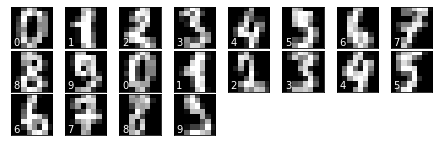

In [13]:
fig3 = plt.figure(figsize=(6,6)) # figure size in inches
fig3.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for index in range(20):
    c=(a-digits.images[index]).reshape(1,64)
    print(model.predict(c),end='')
    if (index+1) % 8 == 0: print('\n') 
    ax1 = fig3.add_subplot(10,8,index+1,xticks=[],yticks=[])
    ax1.imshow((a-digits.images[index]),cmap=plt.cm.binary,interpolation='nearest')
    # label the image with the target value
    ax1.text(0,7,str(digits.target[index]),color=(1,1,1))


## left turn 90 deg: success(95%) (only 0 be classified correctly)

[0][4][4][4][4][4][4][4]

[4][4][4][4][4][4][4][7]

[7][4][4][0]

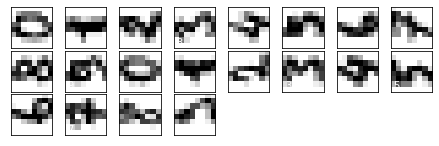

In [14]:
fig3 = plt.figure(figsize=(6,6)) # figure size in inches
fig3.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for index in range(20):
    b=np.empty((8,8))
    for i in range(8):
        b[i]=digits['images'][index].T[7-i]
    c=b.reshape(1,64)
    print(model.predict(c),end='')
    if (index+1)%8==0:print('\n')
    ax1 = fig3.add_subplot(10,8,index+1,xticks=[],yticks=[])
    ax1.imshow((b),cmap=plt.cm.binary,interpolation='nearest')
    # label the image with the target value
    ax1.text(0,7,str(digits.target[index]),color=(1,1,1))

    

## add some black dots around: failed

[0][1][2][3][4][9][6][7]

[8][9][0][1][2][3][4][5]

[6][7][8][9]

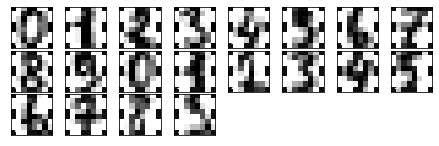

In [15]:
fig3 = plt.figure(figsize=(6,6)) # figure size in inches
fig3.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for index in range(20):
    b=digits['images'][index]
    b[0,0]=15
    b[3,0]=15
    b[0,3]=15
    b[4,0]=15
    b[0,4]=15
    b[7,3]=15
    b[3,7]=15
    b[7,4]=15
    b[4,7]=15
    b[0,7]=15
    b[7,0]=15
    b[7,7]=15
    c=b.reshape(1,64)
    print(model.predict(c),end='')
    if (index+1)%8==0:print('\n')
    ax1 = fig3.add_subplot(10,8,1+index,xticks=[],yticks=[])
    ax1.imshow((b),cmap=plt.cm.binary,interpolation='nearest')
    # label the image with the target value
    ax1.text(0,7,str(digits.target[index]),color=(1,1,1))